# Lung nodules detection with PyTorch

In this notebook I reported some script that has been used to generate some figures for the project report, as well as the command that have been run to train the models and to test them.

In [1]:
%matplotlib inline
import datetime

from util.util import importstr
from util.logconf import logging
import numpy as np
import matplotlib.pyplot as plt

log = logging.getLogger('nb')

In [2]:
def run(app, *argv):
    argv = list(argv)
    argv.insert(0, '--num-workers=4') 
    log.info("Running: {}({!r}).main()".format(app, argv))
    
    app_cls = importstr(*app.rsplit('.', 1))
    app_cls(argv).main()
    
    log.info("Finished: {}.{!r}).main()".format(app, argv))

In [3]:
import os
import shutil

# clean up any old data that might be around.
# We don't call this by default because it's destructive, 
# and would waste a lot of time if it ran when nothing 
# on the application side had changed.
def cleanCache():
    shutil.rmtree('data-unversioned/cache')
    os.mkdir('data-unversioned/cache')

#cleanCache()

# Explore data

## Overall dataset: n° of nodules

In [10]:
from cls.dsets import getCandidateInfoList, getCt, LunaDataset
candidateInfo_list = getCandidateInfoList(requireOnDisk_bool=False)
positiveInfo_list = [x for x in candidateInfo_list if x[0]] # nodules only
diameter_list = [x[1] for x in positiveInfo_list]

In [11]:
print('N° of nodules in the dataset:', len(positiveInfo_list))

print('### First 10 nodules (in size) ###')
for candidateInfo_tup in positiveInfo_list[:10]:
    print(candidateInfo_tup)

N° of nodules in the dataset: 1182
### First 10 nodules (in size) ###
CandidateInfoTuple(isNodule_bool=True, hasAnnotation_bool=True, isMal_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(67.82725575, 85.37992457, -109.74672379999998))
CandidateInfoTuple(isNodule_bool=True, hasAnnotation_bool=True, isMal_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(47.67105722, 37.64251989, -99.89039388))
CandidateInfoTuple(isNodule_bool=True, hasAnnotation_bool=True, isMal_bool=True, diameter_mm=27.44242293, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.943403138251347598519939390311', center_xyz=(-46.94966448, 72.63645381, -95.64452131))
CandidateInfoTuple(isNodule_bool=True, hasAnnotation_bool=True, isMal_bool=True, diameter_mm=27.07544345, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.481278873893653517789960724156', center_xyz=(-103.132511

## Visualize a CT scan

2021-09-15 10:00:33,401 INFO     pid:85733 p2ch14.dsets:326:__init__ <p2ch14.dsets.LunaDataset object at 0x7f82388fc5b0>: 605 training samples, 604 neg, 1 pos, unbalanced ratio


1.3.6.1.4.1.14519.5.2.1.6279.6001.126264578931778258890371755354 562 False [562]


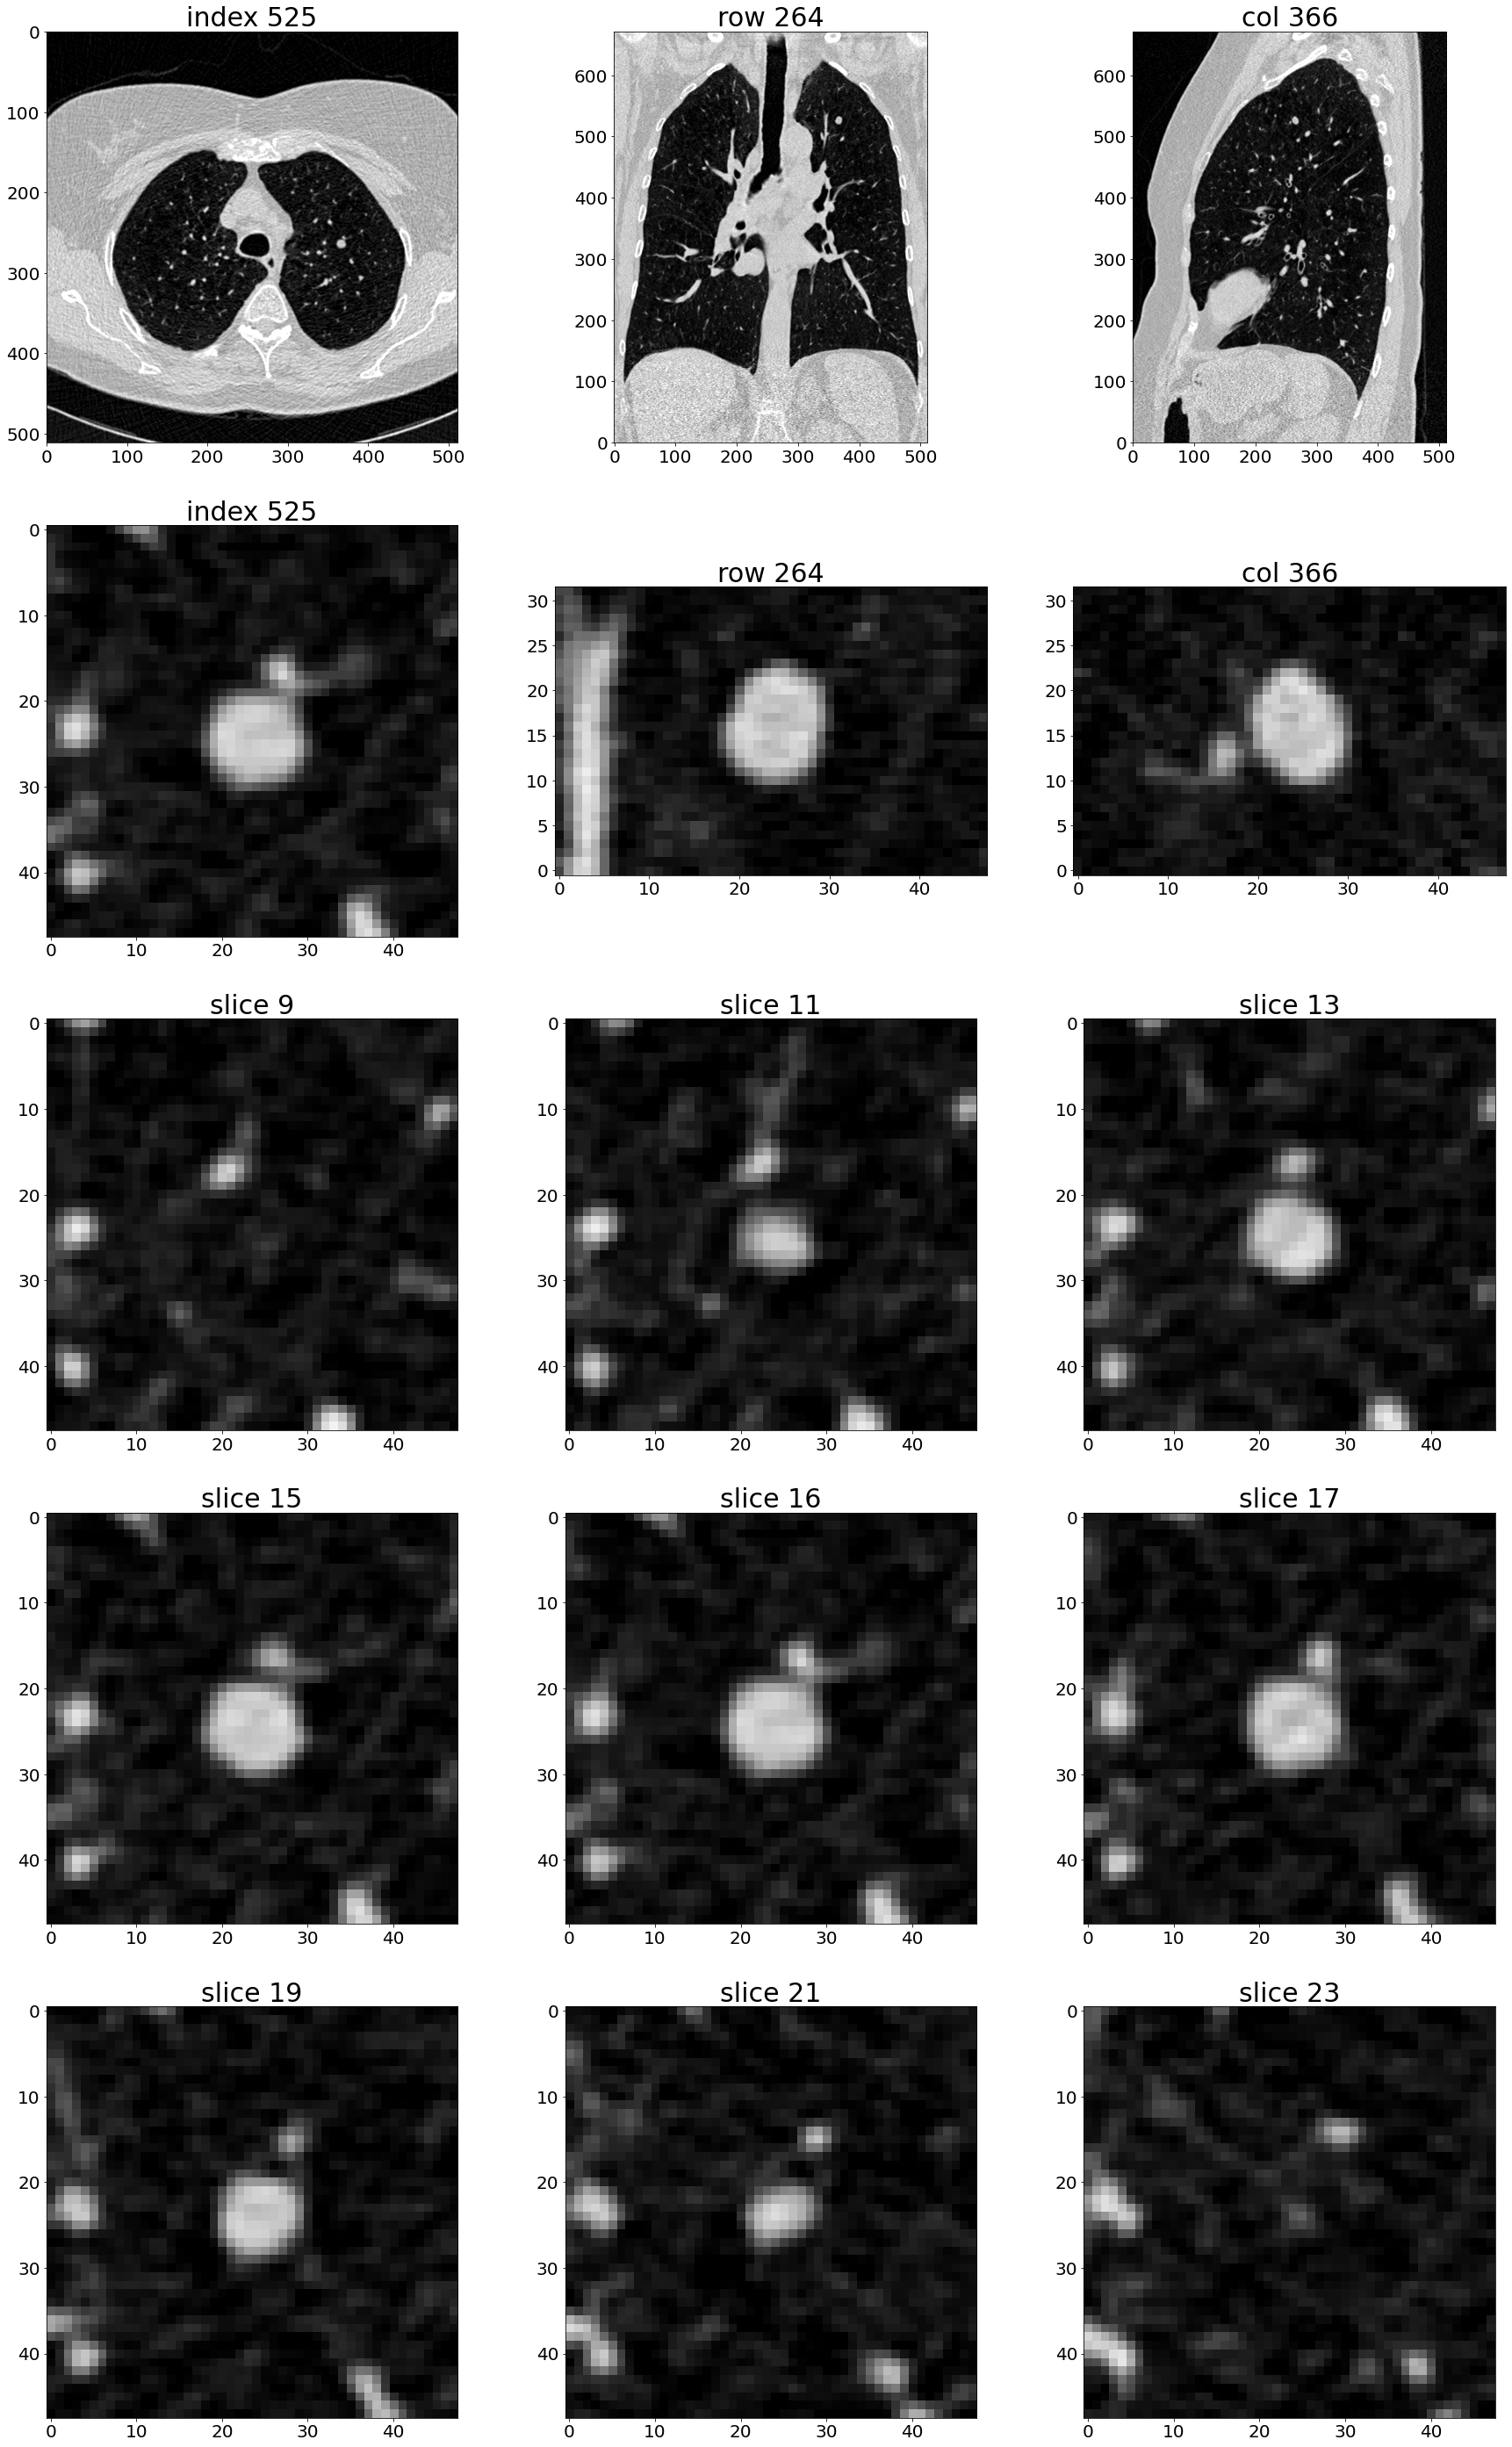

In [13]:
from cls.vis import showCandidate
series_uid = '1.3.6.1.4.1.14519.5.2.1.6279.6001.126264578931778258890371755354'
showCandidate(series_uid)

### 3D visualization

In [3]:
import ipyvolume as ipv
series_uid = '1.3.6.1.4.1.14519.5.2.1.6279.6001.126264578931778258890371755354'
ct = getCt(series_uid)
ipv.quickvolshow(ct.hu_a, level=[0.25, 0.5, 0.9], opacity=0.1, level_width=0.1, data_min=-1000, data_max=1000)

/Users/pietro/Downloads/dlwpt-code-master/.venv/lib/python3.8/site-packages/ipyvolume/widgets.py:179: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data_view = self.data_original[view]
/Users/pietro/Downloads/dlwpt-code-master/.venv/lib/python3.8/site-packages/ipyvolume/utils.py:204: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data = (data[slices1] + data[slices2])/2
/Users/pietro/Downloads/dlwpt-code-master/.venv/lib/python3.8/site-packages/ipyvolume/serialize.py:81: RuntimeWarning: invalid value encountered in true_divide
  gradient =

## Data augmentation

2021-09-15 15:32:04,727 INFO     pid:85733 p2ch14.dsets:326:__init__ <p2ch14.dsets.LunaDataset object at 0x7f81bcbca160>: 56928 training samples, 56816 neg, 112 pos, unbalanced ratio
2021-09-15 15:32:04,759 INFO     pid:85733 p2ch14.dsets:326:__init__ <p2ch14.dsets.LunaDataset object at 0x7f82350c6910>: 56928 training samples, 56816 neg, 112 pos, unbalanced ratio
2021-09-15 15:32:04,787 INFO     pid:85733 p2ch14.dsets:326:__init__ <p2ch14.dsets.LunaDataset object at 0x7f81ab88ca60>: 56928 training samples, 56816 neg, 112 pos, unbalanced ratio
2021-09-15 15:32:04,817 INFO     pid:85733 p2ch14.dsets:326:__init__ <p2ch14.dsets.LunaDataset object at 0x7f8235817070>: 56928 training samples, 56816 neg, 112 pos, unbalanced ratio
2021-09-15 15:32:04,844 INFO     pid:85733 p2ch14.dsets:326:__init__ <p2ch14.dsets.LunaDataset object at 0x7f81aeacc430>: 56928 training samples, 56816 neg, 112 pos, unbalanced ratio
2021-09-15 15:32:04,871 INFO     pid:85733 p2ch14.dsets:326:__init__ <p2ch14.dsets.Lu

torch.Size([1, 32, 48, 48]) (tensor([0, 1]), 1, '1.3.6.1.4.1.14519.5.2.1.6279.6001.752756872840730509471096155114', tensor([108, 328, 341]))


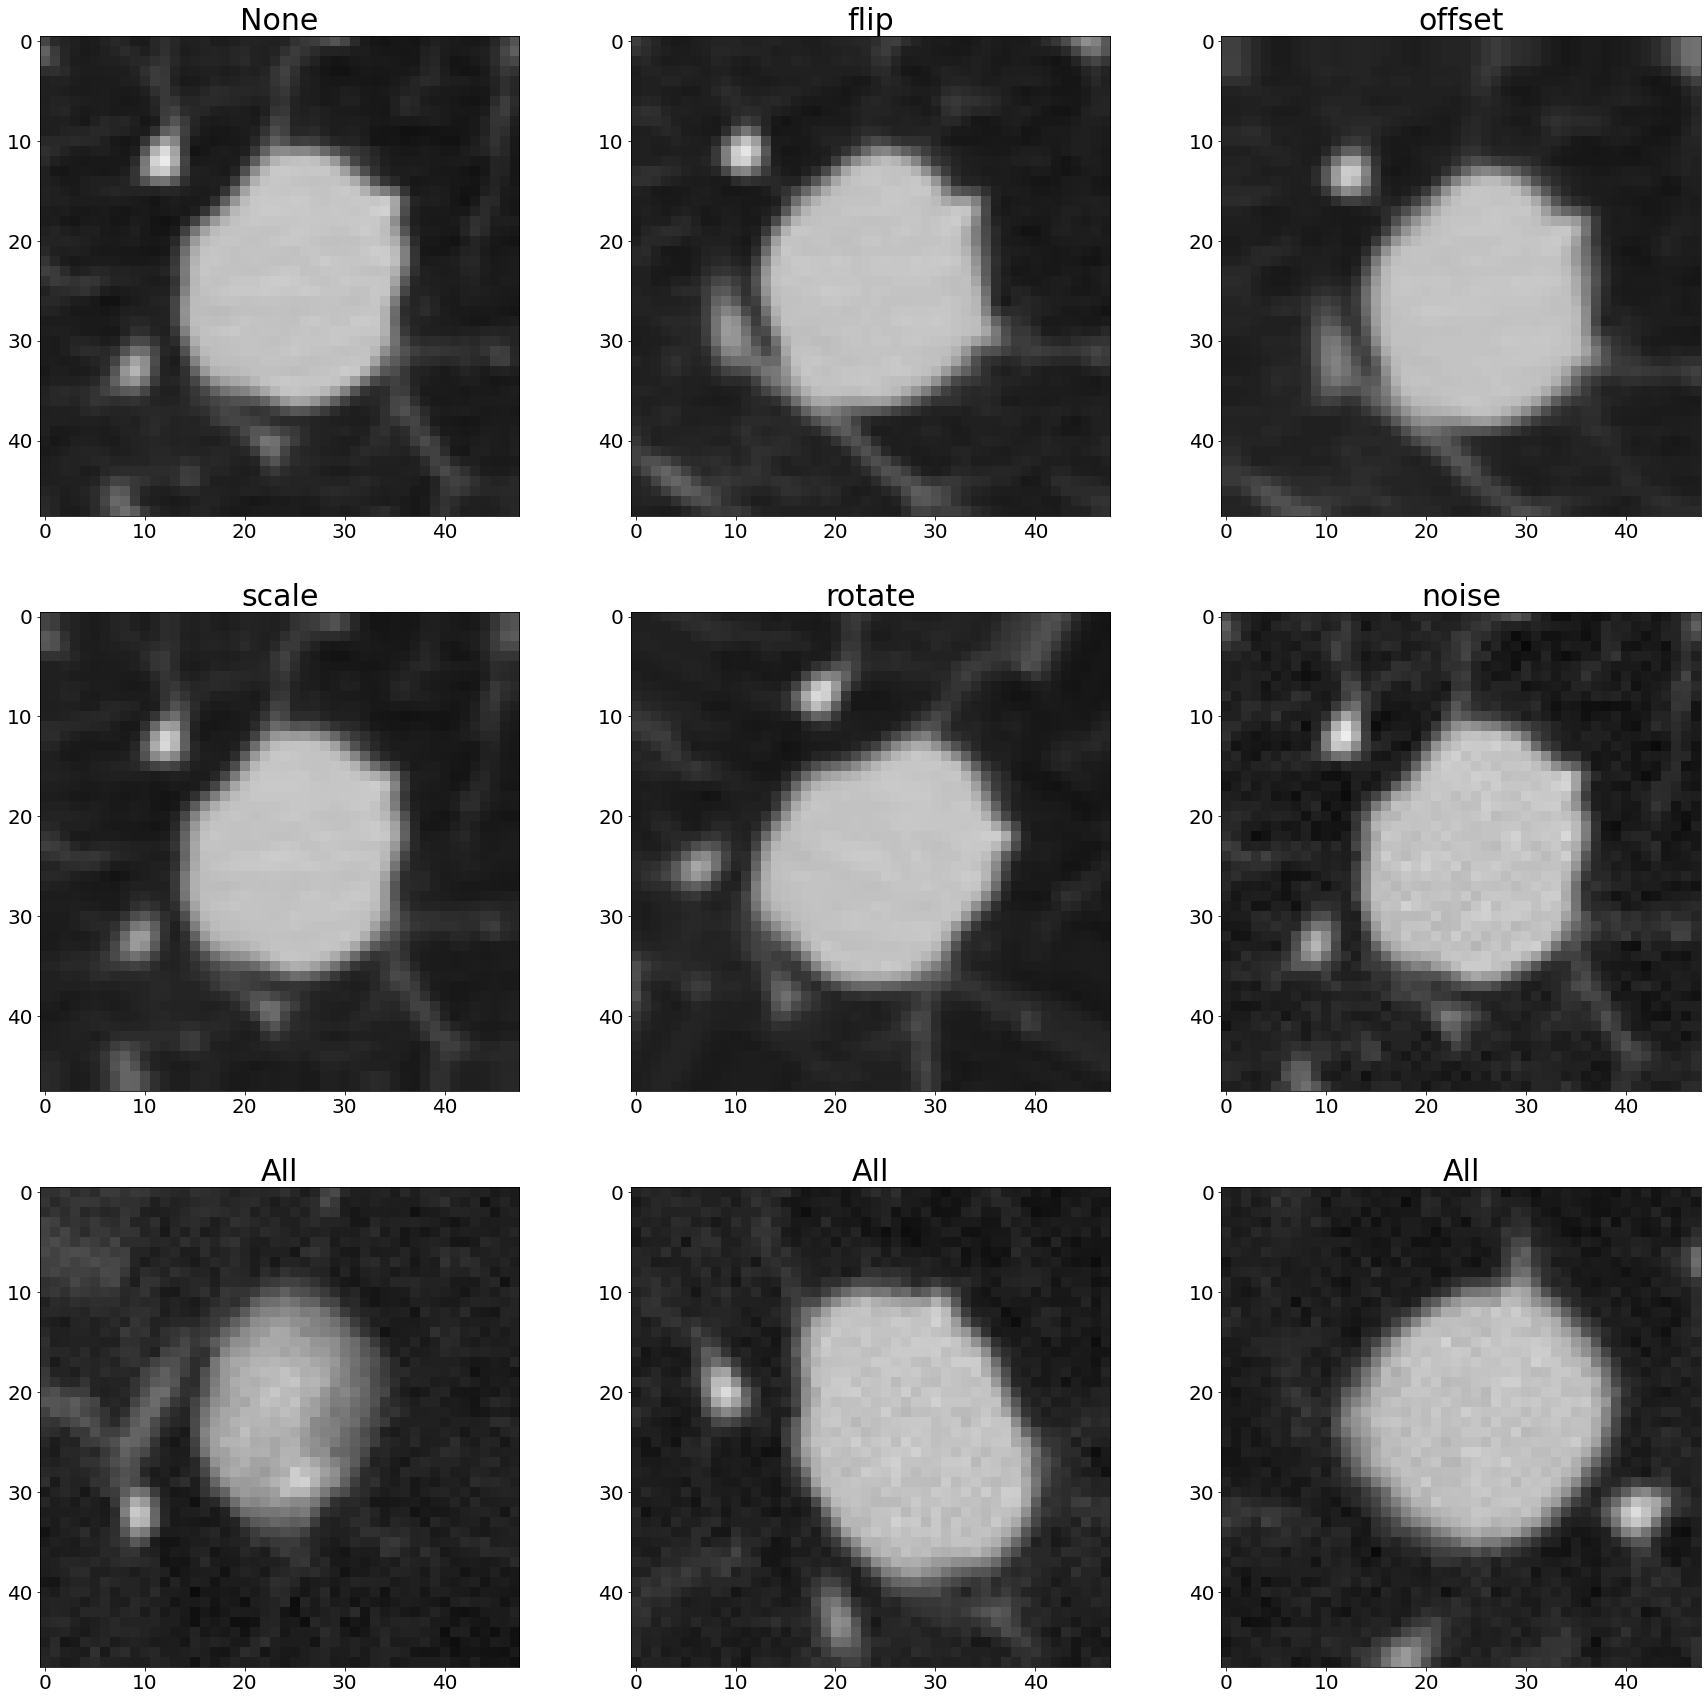

In [32]:
from cls.vis import showCandidate

augmentation_dict = {}
augmentation_list = [
    ('None', {}),
    ('flip', {'flip': True}),
    ('offset', {'offset': 0.1}),
    ('scale', {'scale': 0.2}),
    ('rotate', {'rotate': True}),
    ('noise', {'noise': 25.0}),    
]
ds_list = [
    LunaDataset(sortby_str='label_and_size', augmentation_dict=augmentation_dict) 
    for title_str, augmentation_dict in augmentation_list
]

all_dict = {}
for title_str, augmentation_dict in augmentation_list:
    all_dict.update(augmentation_dict)
all_ds = LunaDataset(sortby_str='label_and_size', augmentation_dict=all_dict)

augmentation_list.extend([('All', augmentation_dict)] * 3)
ds_list.extend([all_ds] * 3)

sample_ndx = 2

sample_tup = all_ds[sample_ndx]
print(sample_tup[0].shape, sample_tup[1:])

fig = plt.figure(figsize=(30, 30))

clim = (-1000.0, 300)

for i, ((title_str, _), ds) in enumerate(zip(augmentation_list, ds_list)):
    sample_tup = ds[sample_ndx]
    subplot = fig.add_subplot(3, 3, i+1)
    subplot.set_title(title_str, fontsize=30)
    for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
        label.set_fontsize(20)
    plt.imshow(sample_tup[0][0][16], clim=clim, cmap='gray')

# Segmentation app

The next code cells illustrates how the training scripts can be invoked from a notebook. In my project I invoked them directly from the command line using the `python` command.

In [ ]:
# Prepare the cache
run('seg.prepcache.LunaPrepCacheApp')

In [ ]:
# Train the segmentation model, select best model and evaluate test set performance
run('seg.training',
    '--epochs=15',
    '--num-workers=2',
    '--augmented',
    'seg_15_epochs'
)

# Nodule classifier

The next code snippets allow to train a nodule classifier. For the project I used bash command directly rather than doing it via Jupyter Notebook.

In [ ]:
# Prepare cache
run('cls.prepcache.LunaPrepCacheApp')

In [ ]:
# Train classifier for 60 epochs
run('cls.training.ClassificationTrainingApp', 
    '--num-workers=4',
    '--epochs=60',
    '--dataset=LunaDataset',
    '--model=LunaModel',
    'nodule-nonnodule'
)

# which is equivalent to the bash command:
# python -m cls.training --num-workers=4 --epochs 60 nodule-nonnodule

In [ ]:
# Train for 15 more epochs (80-95)
model_path = 'data-unversioned/part2/models/cls/cls_2021-08-09_14.47.34_nodule-nonnodule-finetune-part2.500000.state'
run('cls.training.ClassificationTrainingApp', 
    f'--finetune={model_path}',
    '--finetune-depth=0',
    '--epochs=15',
    '--num-workers=4'
    '--dataset=LunaDataset',
    '--model=LunaModel',
    'nodule-nonnodule-finetune-epochs80-95'
)

# which is equivalent to the bash command:
# python -m cls.training --num-workers=4 --epochs 15 --finetune data-unversioned/part2/models/cls/cls_2021-08-09_14.47.34_nodule-nonnodule-finetune-part2.500000.state --finetune-depth 0 nodule-nonnodule-finetune-epochs80-95

# Malignancy classifier

The next code snipptes allow to train a malignancy classifier, either by fine-tuning a nodule classifier, or from scratch. For the project I used bash command directly rather than doing it via Jupyter Notebook.

In [ ]:
# fine tuning the best nodule classifier (fix all parameters except last two blocks of the network)
model_path = 'data-unversioned/part2/models/cls/cls_2021-08-10_10.22.39_nodule-nonnodule-finetune-epochs80-95.best.state'
run('cls.training.ClassificationTrainingApp', 
    '--malignant'
    f'--finetune={model_path}',
    '--finetune-depth=2',
    '--epochs=10',
    '--num-workers=4'
    '--dataset=MalignantLunaDataset',
)

# which is equivalent to the bash command:
# python -m cls.training --malignant --dataset=MalignantLunaDataset --finetune=data-unversioned/part2/models/cls/cls_2021-08-10_10.22.39_nodule-nonnodule-finetune-epochs80-95.best.state --epochs=10 --finetune-depth=2 

In [ ]:
# training from scratch using the same architecture as the nodule classifier
run('cls.training.ClassificationTrainingApp', 
    '--malignant'
    '--epochs=30',
    '--num-workers=4'
    '--dataset=MalignantLunaDataset',
    'malignancy_classifier'
)

# which is equivalent to the bash command:
# python -m cls.training --malignant --dataset=MalignantLunaDataset --epochs=30 malignancy_classifier

In [ ]:
# bash command to run the malignancy model on the test set
# python -m cls.training --malignant --dataset=MalignantLunaDataset --testing=data-unversioned/part2/models/cls/mal_2021-08-08_08.42.29_malignancy_classifier.best.state

# End to end model evaluation
With the following commands it is possible to evaluate the overall pipeline performance either on the validation set or on the test set.

In [ ]:
# python -m cls.nodule_analysis --run-validation 
# --segmentation-path=data-unversioned/part2/models/seg/seg_2021-09-17_06.47.52_seg_15_epochs.best.state 
# --classification-path=data-unversioned/part2/models/cls/cls_2021-08-10_10.22.39_nodule-nonnodule-finetune-epochs80-95.best.state  
# --malignancy-path=data-unversioned/part2/models/cls/mal_2021-08-08_08.42.29_malignancy_classifier.best.state 
# --num-workers=2

```
Output: 

Total
                 |    Complete Miss |     Filtered Out |     Pred. Benign |  Pred. Malignant
     Non-Nodules |                  |           162825 |              641 |              113
          Benign |               12 |                6 |               71 |               13
       Malignant |                1 |                6 |                8 |               37
```

In [ ]:
# python -m cls.nodule_analysis --run-testing 
# --segmentation-path=data-unversioned/part2/models/seg/seg_2021-09-17_06.47.52_seg_15_epochs.best.state 
# --classification-path=data-unversioned/part2/models/cls/cls_2021-08-10_10.22.39_nodule-nonnodule-finetune-epochs80-95.best.state 
# --malignancy-path=data-unversioned/part2/models/cls/mal_2021-08-08_08.42.29_malignancy_classifier.best.state --num-workers=2

```
Output: 

Total
                 |    Complete Miss |     Filtered Out |     Pred. Benign |  Pred. Malignant
     Non-Nodules |                  |           144659 |              552 |               80
          Benign |               12 |                3 |               39 |                6
       Malignant |                2 |                7 |                7 |               16
```

# Plotting metrics with Tensorboard
By using the following command, we can run a Tensorboard session at `http://localhost:6006` in which we can plot metrics for each model we trained.

In [ ]:
%tensorboard --logdir runs/